In [1]:
from fast_rl.agents.dqn import *
from fast_rl.agents.dqn_models import FixedTargetDQNModule
from fast_rl.core.agent_core import *
from fast_rl.core.data_block import *
from fast_rl.core.train import *

Can't import one of these: No module named 'pybulletgym.envs.mujoco.envs'
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


epoch,train_loss,valid_loss,time
0,0.189005,#na#,00:02
1,0.202970,#na#,00:03


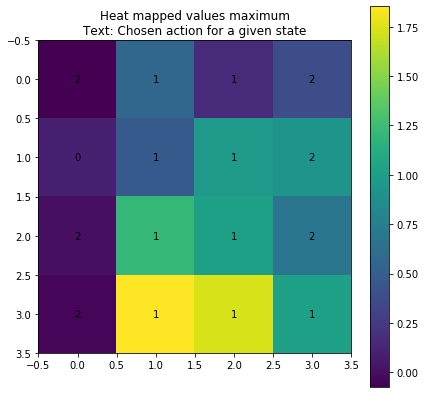

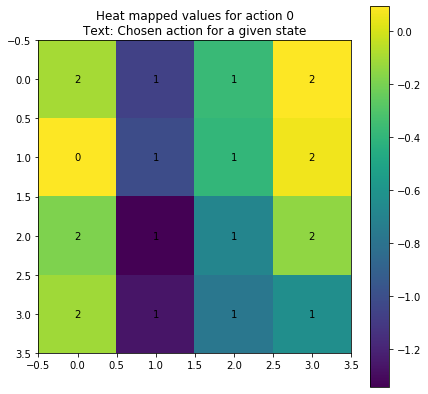

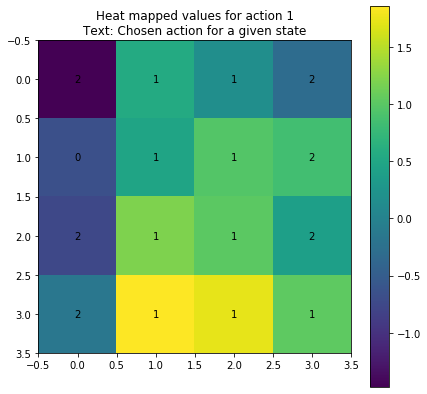

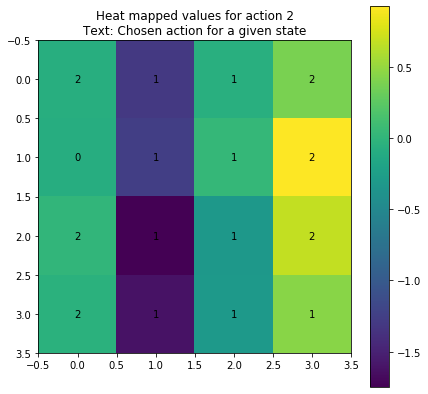

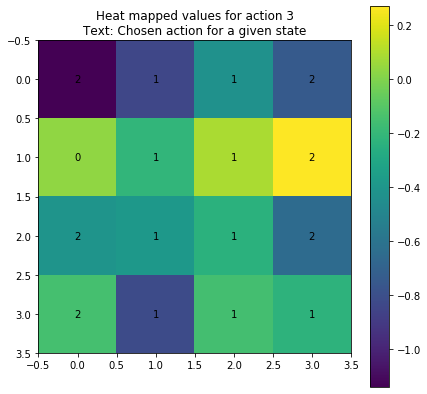

In [2]:
data = MDPDataBunch.from_env('maze-random-5x5-v0', render='rgb_array', bs=5, max_steps=50,
                             add_valid=False, feed_type=FEED_TYPE_STATE)
model = create_dqn_model(data, FixedTargetDQNModule, opt=torch.optim.RMSprop)
memory = ExperienceReplay(10000)
exploration_method = GreedyEpsilon(epsilon_start=1, epsilon_end=0.1, decay=0.001)
learner = dqn_learner(data=data, model=model, memory=memory, exploration_method=exploration_method)
learner.fit(2)

interp = GymMazeInterpretation(learner, ds_type=DatasetType.Train)
for i in range(-1, 4): interp.plot_heat_map(action=i)

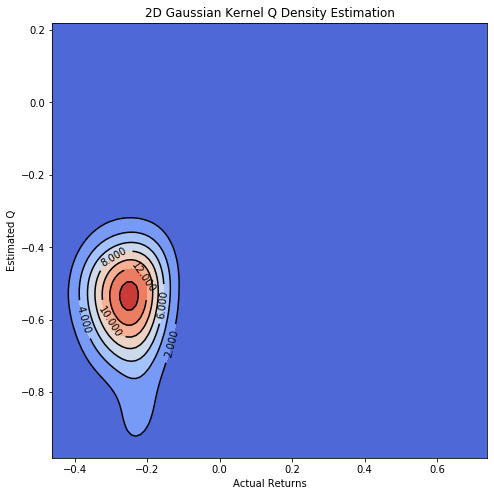

In [3]:
q_interp = QValueInterpretation(learner, ds_type=DatasetType.Train)
q_interp.plot_q()